# 🍄⚠️ Edible or Poisonous? A Mushroom Classification Model using 🌳 Decision Trees

### 🍄 Problem Definition:

Objective:

To build a Decision Tree Classifier that can predict whether a mushroom is poisonous (p) or edible (e) based on its physical characteristics.


Why Does This Matter? 

Foraging mushrooms in the wild is risky: Some mushrooms are edible and delicious, while others are highly poisonous and potentially fatal.

Misidentification can lead to serious health risks or even death.

Automating mushroom classification using machine learning can assist:

Foragers

Farmers

Supply chains

Medical and food safety teams

# 📂 Dataset Overview:
Target Variable:
class → edible (e) or poisonous (p)

Features:
22 categorical variables describing:

Cap shape, color, odor

Gill size, attachment, spacing

Stalk dimensions, color

Habitat, population

### CART - Classification and Regression Trees

### Importing Libraries and Dataset

Importing libraries matplotlib and seaborn

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

Importing data set

In [84]:
dataset = pd.read_csv('mushrooms.csv')

###  Exploratory data analysis 

In [54]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [85]:
dataset.isnull().sum().sum()

0

There is no null value in the dataset

In [86]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [57]:
### Display unique values of Response variable (class)

In [87]:
dataset['class'].value_counts()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [88]:
# To see if there is any null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are categorical and there is no missing value.

In [89]:
#To find number of rows and column
dataset.shape

(8124, 23)

<AxesSubplot:xlabel='class', ylabel='Count'>

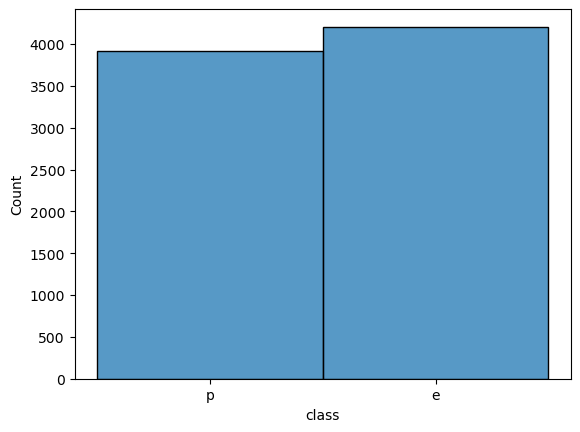

In [90]:
sns.histplot(dataset['class'])

### Separating Features and Target

Target is in column class. So X will have all values apart from column class and y will have column class

In [92]:
X = dataset.drop(['class'],axis=1)

y = dataset['class']

In [93]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [94]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

As all the values in the dataset are categorical.
X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [65]:
# how to get dummies for all x variable

In [95]:
X = pd.get_dummies(X)
X.head()

# for  those who are getting True / False , convert into int as follows.
#X = pd.get_dummies(X).astype(int)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
# how to get dummies or convert categorical alphabet value e or p to 1 and 0

# use LabelEncoder

#Encode target labels with value between 0 and n_classes-1.

# OrdinalEncoder
# Encode categorical features using an ordinal encoding scheme.

# OneHotEncoder
# Encode categorical features as a one-hot numeric array.

In [96]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as
Poisonous = p -> 1
Edible = e -> 0

### Splitting Dataset to training and test data 80 % - 20 %

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [71]:
y_train.shape , y_test.shape

((6499,), (1625,))

### Decision Tree Creation 

In [97]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [98]:
from sklearn.metrics import accuracy_score

### Creation of Decision Tree using Gini Index

In [74]:
#Create model using gini 

In [75]:
#Using the Decision Tree Classifier with splitting criterion 
# as Gini impurity, the maximum depth of the tree is 3.

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [99]:
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6515,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6141,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2764,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
438,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [100]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

In [79]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 0, 1, 0])

### Checking Overfitting 

Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. 

Overfitting is very common problem with decision tree.

In [80]:
#Determine the accuracy score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

#Accuracy Score for training set

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9809
Training-set accuracy score: 0.9863


[Text(0.5769230769230769, 0.875, 'odor_n <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]\nclass = edible'),
 Text(0.3076923076923077, 0.625, 'stalk-root_c <= 0.5\ngini = 0.284\nsamples = 3666\nvalue = [627, 3039]\nclass = poisonous'),
 Text(0.15384615384615385, 0.375, 'stalk-root_r <= 0.5\ngini = 0.124\nsamples = 3221\nvalue = [213, 3008]\nclass = poisonous'),
 Text(0.07692307692307693, 0.125, 'gini = 0.044\nsamples = 3077\nvalue = [69, 3008]\nclass = poisonous'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]\nclass = edible'),
 Text(0.46153846153846156, 0.375, 'ring-type_p <= 0.5\ngini = 0.13\nsamples = 445\nvalue = [414, 31]\nclass = edible'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = poisonous'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 414\nvalue = [414, 0]\nclass = edible'),
 Text(0.8461538461538461, 0.625, 'spore-print-color_r <= 0.5\ngini = 0.065\nsamples = 2833\nvalue = [2738,

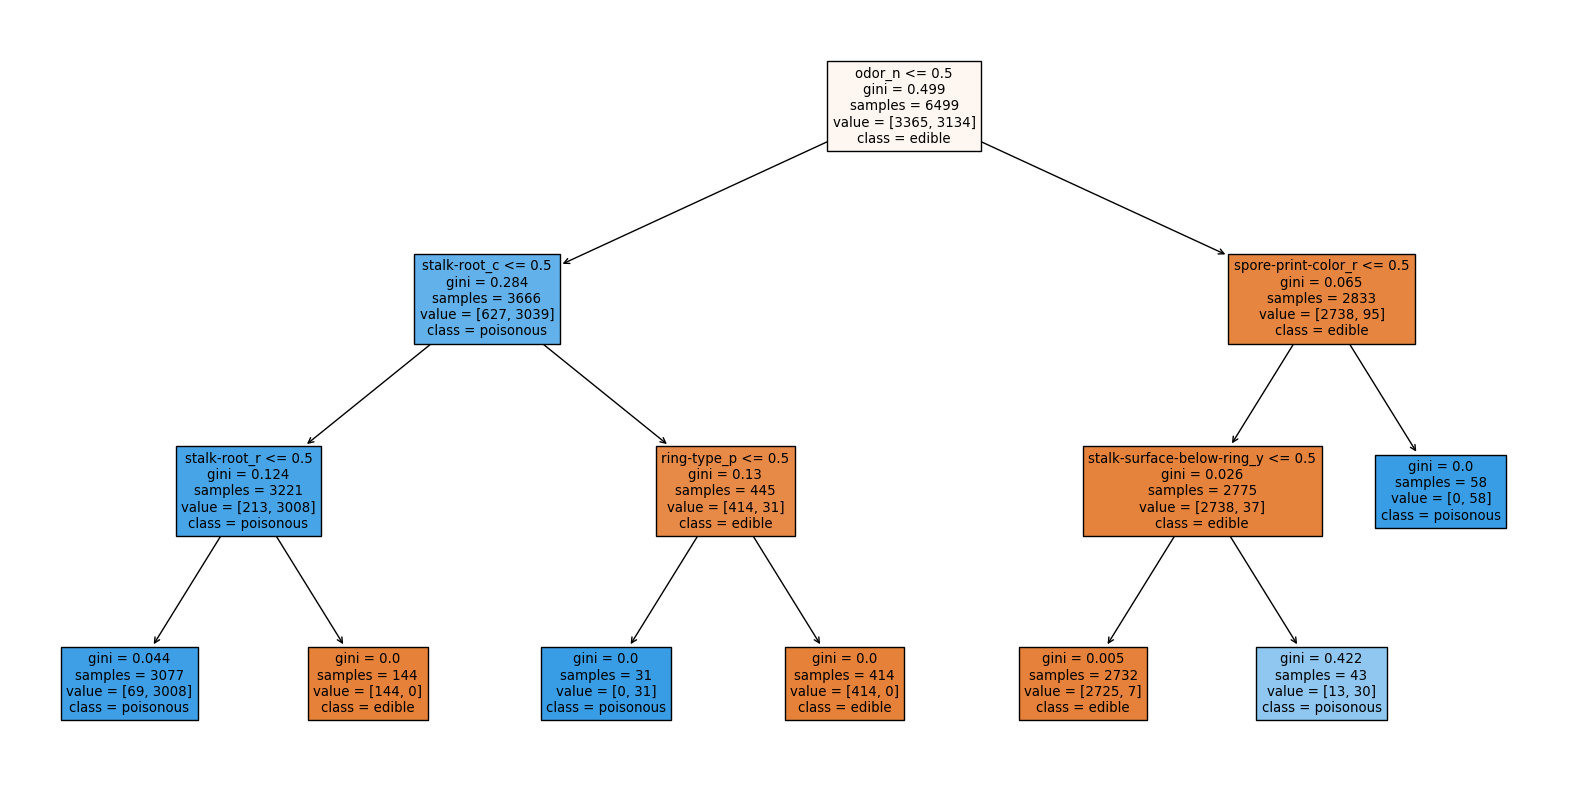

In [101]:
plt.figure(figsize=(20,10))

class_names = ['edible', 'poisonous']

plot_tree(clf_gini, feature_names=feature_names, class_names=class_names, filled=True)


### Creation of Decision Tree using with entropy

In [102]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.66\nsamples = 3666\nvalue = [627, 3039]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.974\nsamples = 1054\nvalue = [627, 427]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.918\nsamples = 640\nvalue = [213, 427]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 414\nvalue = [414, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2612\nvalue = [0, 2612]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.212\nsamples = 2833\nvalue = [2738, 95]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.102\nsamples = 2775\nvalue = [2738, 37]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.026\nsamples = 2732\nvalue = [2725, 7]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.884\nsamples = 43\nvalue = [13, 30]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsa

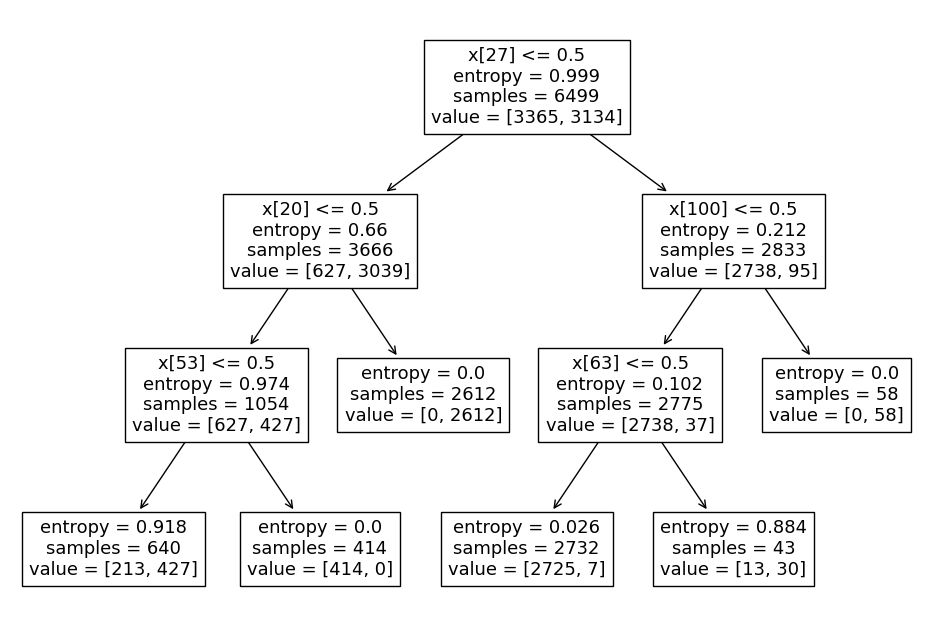

In [103]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [104]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [105]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [106]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9514
Training-set accuracy score: 0.9641


In [107]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9641
Test set score: 0.9514


### Confusion Matrix 

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [110]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[765  78]
 [  1 781]]


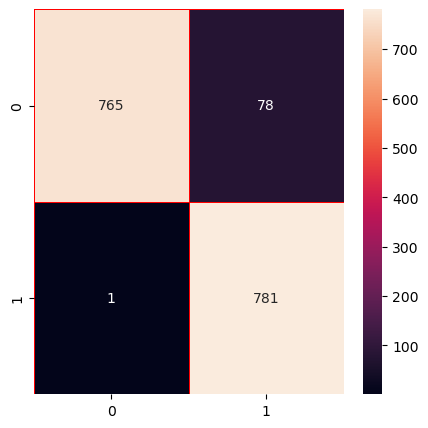

<Figure size 640x480 with 0 Axes>

In [111]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [112]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       843
           1       0.91      1.00      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.96      0.95      0.95      1625



### Conclusion

Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.